# Summary: 

#Missing data is:
### 31% of the Sulfate data is missing
### 17.6% of the ph data is missing
### 5.2% of the Trihalomethanes data is missing

#Outliers are:

### ph: [2075, 3014]
### hardness: [263]
### Sulfate: [1554]


# Mean and Median numericals values are so close.

###Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

### - No linear relationship between the features because we have binary label and continuous features. So, Linear model may not work on this case.


### - The Boxplot and density distribution of different features by Potability show that the difference in mean values aren't big.

### - There are some differences in the feature distribution among the potability, so we could get use of these differences while modelling. (ex: SUlfate, hardness, and chloramines have big impact on the water health).

### **PH:** The WHO guidelines for Drinking water is between 6.5 and 8.5 Outside these limits many halmful metals may become soluble.
* and some of the data excedes thos limits as shown:


###**Hardness:** In some instances, consumers tolerate water hardness in excess of 500 mg/l. 
* and all of the data variables are considered acceptable.

###**TDS:** Desirable limit for TDS is 500 mg/L and maximum limit is 1000 mg/l which prescribed for drinking purpose. However these guidelines are based on taste. Over 1000 mg/L is considered unacceptable.

* There is a large number of water samples that are above the acceptable 1,000 mg/l TDS limit. However this would leave most of our water samples unaceptable


###**Chloramines:**Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water. Chloramines are lower based on taste and smell.

* about Only 2% of the water samples were safe in terms of Chloramines levels


### **Sulfate:** It is generally considered that taste impairment is minimal at levels below 250 mg/l. No health-based guideline value has been derived for sulfate
* and only1.8% of the water samples were safe in terms of Sulfate levels


### **Conductivity:** EC value should not exceeded 400 μS/cm.
* some of the conductivity values of the samples calssified potable exceed the stated limits


### **Total Organic Carbon (TOC):** According to US EPA < 2 mg/L as TOC in treated / drinking water

* some samples classified potable would not pass the US EPA

### **Trihalomethanes:** THM levels up to 80 ppm is considered safe in drinking water
* some samples considered potable also exceeded the 80 ppm levels.

### **Turbidity:** WHO recommended value below 5.00 NTU, ideally below 1 NTU
* some samples considered potable also exceeded the 5.00 NTU levels.

### Depending on the AUC -Area under the curve- estimation, The Catboost Classifier is the best estimation and modelling method.

**- Why AUC?** It represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between potable water with the non potable water, which is importnat to us and so I choose AUC as evaluation metrics.

#Model Analysis:
- A high level of the ph has a high and positive impact on the potability of water, while the Hardness is negatively correlated with the potability of water.





#Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import numpy.random as rnd
import statsmodels.api as sm

import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Intro to the data and Statistical analysis:

In [2]:
data = pd.read_csv('/content/water_potability.csv', sep=',', encoding='utf-8')
data.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

### - Counts of each column arent the same.
### - The Solids feature has the highst median, mean, and standard deviation.

In [4]:
df = data.copy()
data = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [5]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


### When water is drinkable:

In [6]:

df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### When water isn't safe for human use:

In [7]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [9]:
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[data[i].isnull()][i]))

In [10]:
get_null_count(data)

ph :  491
Hardness :  0
Solids :  0
Chloramines :  0
Sulfate :  781
Conductivity :  0
Organic_carbon :  0
Trihalomethanes :  162
Turbidity :  0


In [11]:
data.shape

(3276, 9)

In [12]:
data.value_counts()

ph         Hardness    Solids        Chloramines  Sulfate     Conductivity  Organic_carbon  Trihalomethanes  Turbidity
14.000000  235.677458  24008.992040  5.635029     381.097711  460.745267    13.452538       72.859468        3.170994     1
6.460034   215.440641  35775.793396  6.502544     307.563455  365.094143    8.127543        77.554953        3.535598     1
6.436444   192.995665  19579.389546  7.640874     314.922739  379.675367    12.897049       75.839132        3.415851     1
6.438422   202.537835  26448.245087  5.775933     322.451774  567.201675    12.641968       55.701067        3.380360     1
6.442496   183.071355  11592.445624  8.960736     408.242670  385.014867    16.148258       83.332516        2.891019     1
                                                                                                                         ..
7.719001   196.007518  13939.294022  6.935551     345.653662  423.203533    16.836786       89.338649        2.884819     1
7.721033   20

Total Missing:  1434


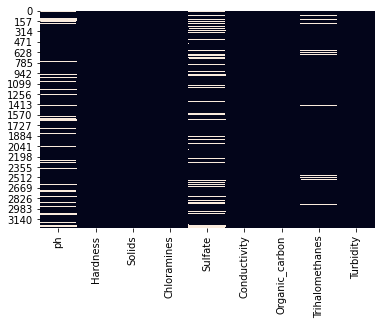

In [13]:
sns.heatmap(data.isnull(), cbar=False)
print("Total Missing: ", data.isna().sum().values.sum())

In [14]:
data.pivot_table(index = 'Sulfate', aggfunc='size')

Sulfate
129.000000    1
180.206746    1
182.397370    1
187.170714    1
187.424131    1
             ..
460.107069    1
462.474215    1
475.737460    1
476.539717    1
481.030642    1
Length: 2495, dtype: int64

In [15]:
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64


In [16]:
data.pivot_table(index = 'ph', aggfunc='size')

ph
0.000000     1
0.227499     1
0.975578     1
0.989912     1
1.431782     1
            ..
12.246928    1
13.175402    1
13.349889    1
13.541240    1
14.000000    1
Length: 2785, dtype: int64

In [17]:
data.pivot_table(index = 'Trihalomethanes', aggfunc='size')

Trihalomethanes
0.738000      1
8.175876      1
8.577013      1
14.343161     1
15.684877     1
             ..
114.208671    1
116.161622    1
118.357275    1
120.030077    1
124.000000    1
Length: 3114, dtype: int64

# Discovering the Outliers:

In [18]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



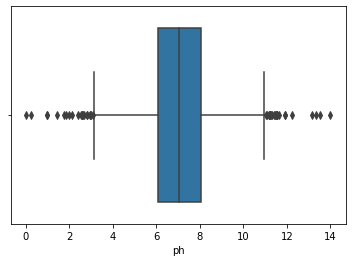

In [19]:
sns.boxplot(data['ph'])

In [20]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [21]:
#Tukey's method
def tukeys_method(data, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(data[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(data[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        


In [22]:
"""
#Transform 'CRIM' to log 
log_CR = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)
"""

"\n#Transform 'CRIM' to log \nlog_CR = np.log(df['CRIM'])\ndf['CRIM_man'] = df['CRIM']+1\nlog_CRIM = np.log(df['CRIM_man'])\ndf['CRIM_log'] = log_CRIM\n\n#Plot\nsns.distplot(df['CRIM_log'])\n\n#Calculate probable and possible outliers using log-iq method\nprobable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')\nprint(probable_outliers_logiq)\nprint(possible_outliers_logiq)\n"

In [23]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149


In [24]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [25]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "ph")
print(probable_outliers_tm)

[2075, 3014]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



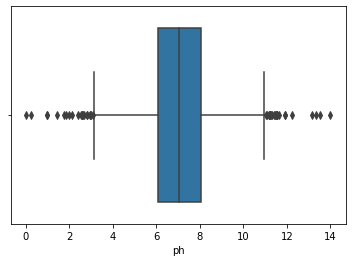

In [26]:
sns.boxplot(data['ph'])

In [27]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "Hardness")
print(probable_outliers_tm)

[263]


In [28]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Solids')
print(probable_outliers_tm)

[]


In [29]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Chloramines')
print(probable_outliers_tm)

[]


In [30]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Sulfate')
print(probable_outliers_tm)

[1554]


In [31]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Conductivity')
print(probable_outliers_tm)

[]


In [32]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Organic_carbon')
print(probable_outliers_tm)

[]


In [33]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, 'Trihalomethanes')
print(probable_outliers_tm)

[]


In [34]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

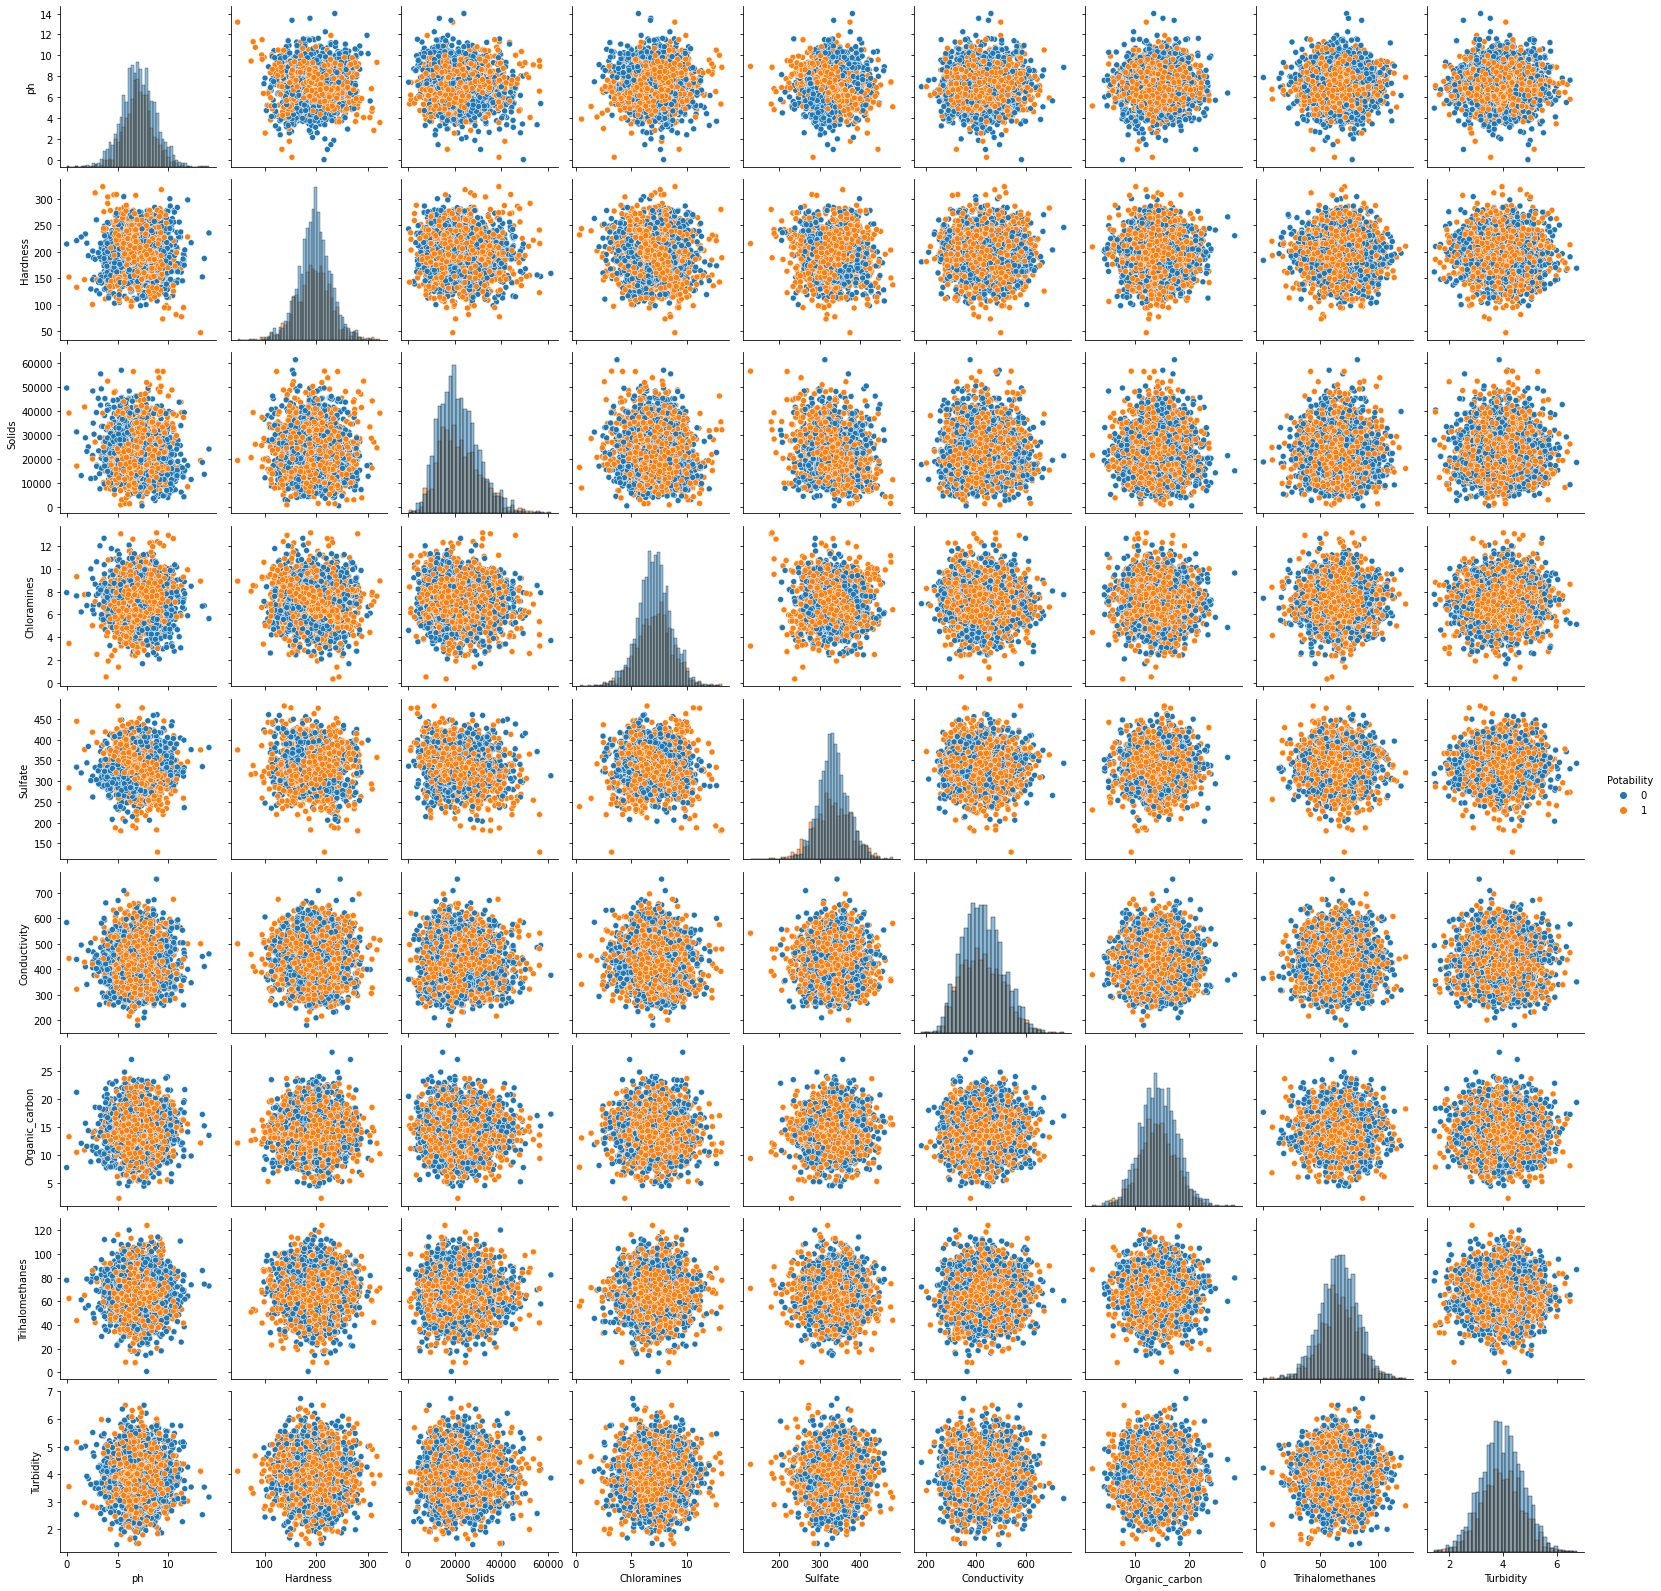

In [35]:
sns.pairplot(df, hue="Potability", diag_kind="hist")

## Missing Data imputation:

In [36]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [37]:
#Outliers handelling:

df['ph'].replace(2075 , "NaN",inplace=True)

In [38]:
df['ph'].replace(3014 , "NaN",inplace=True)

In [39]:
df['Hardness'].replace(263 , "NaN",inplace=True)

In [40]:
df['Sulfate'].replace(1554 , "NaN",inplace=True)

In [41]:
df = df.drop_duplicates()

In [42]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [43]:
from sklearn.impute import KNNImputer

In [44]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['ph'] = knn_imputer.fit_transform(df[['ph']])

In [45]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['Sulfate'] = knn_imputer.fit_transform(df[['Sulfate']])

In [46]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['Trihalomethanes'] = knn_imputer.fit_transform(df[['Trihalomethanes']])

In [47]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [48]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,3276.000000,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.000000,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.000000,66.396293,15.769881,0.738000,56.647656,66.396293,76.666609,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


# Data Visualisation: 
### 61% of the data is not drinkable

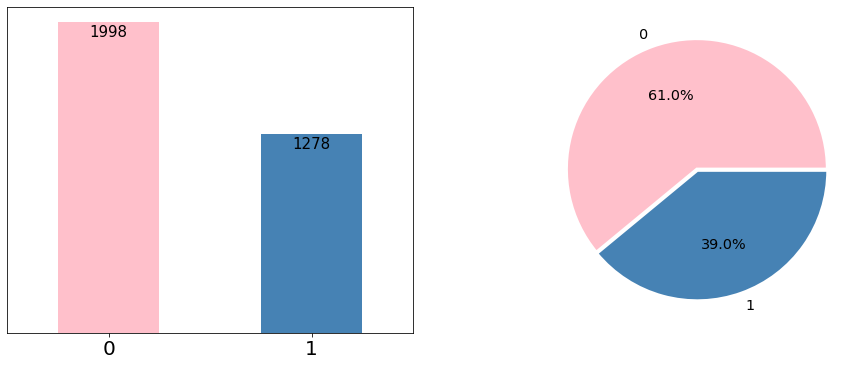

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))
df.Potability.value_counts().plot(kind='bar', color=['pink', 'steelblue'], rot=0, ax=ax[0])
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height(), 'd'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                                    ha='center', va='center', size=15, xytext=(0, -10),
                                                    textcoords='offset points')
ax[0].tick_params(left=False, labelleft=False)
ax[0].xaxis.set_tick_params(labelsize=20)

labels = list(df['Potability'].unique())
ax[1].pie(df['Potability'].value_counts(), labels=labels, autopct = '%1.1f%%',
          colors=['pink', 'steelblue'], explode = [0.005]*len(labels),
          textprops={'size': 'x-large'},
         wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()

### - No linear relationship between the features because we have binary label and continuous features. So, Linear model may not work on this case.

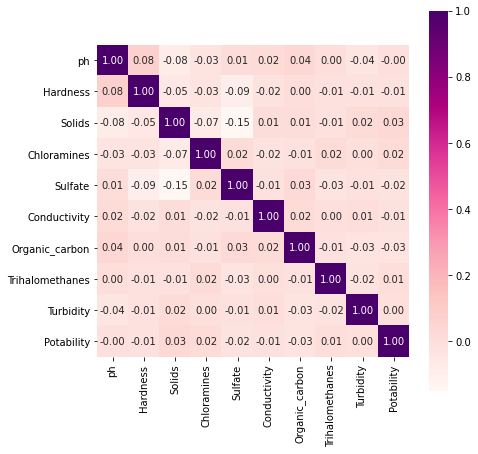

In [51]:
Corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="RdPu", square = True, annot=True, fmt='.2f')
plt.show()

### - The Boxplot and density distribution of different features by Potability show that the difference in mean values aren't big.

### - There are some differences in the feature distribution among the potability, so we could get use of these differences while modelling. (ex: SUlfate, hardness, and chloramines have big impact on the water health).

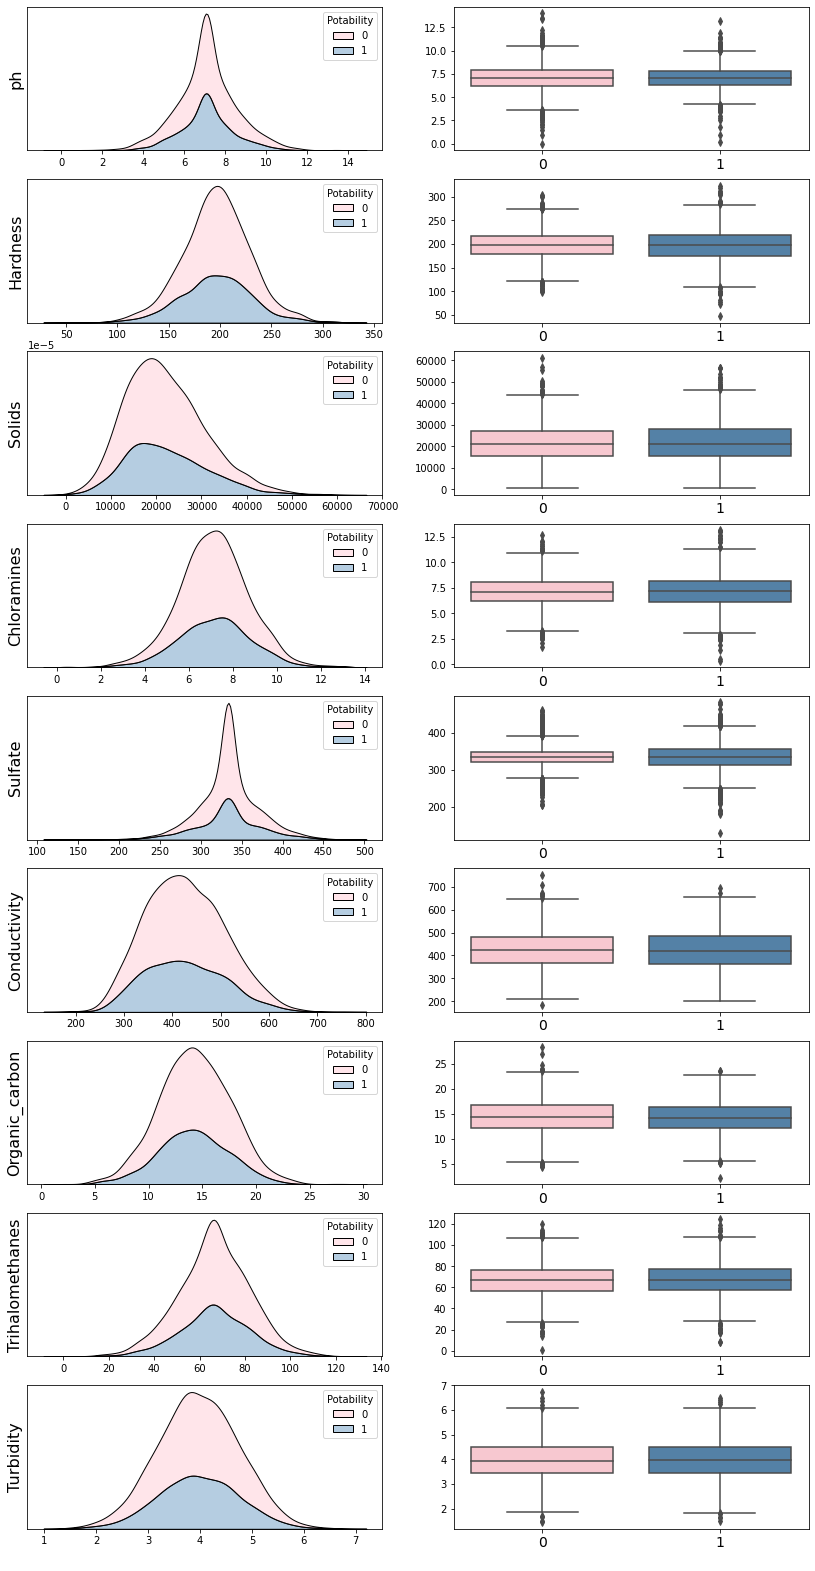

In [52]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features = list(df.columns.drop('Potability'))
i=0
for cols in features:
    sns.kdeplot(df[cols], fill=True, alpha=0.4, hue = df.Potability, 
                palette=('pink', 'steelblue'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Potability', ax=ax[i, 1],
               palette=('pink', 'steelblue'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1
      
plt.show()

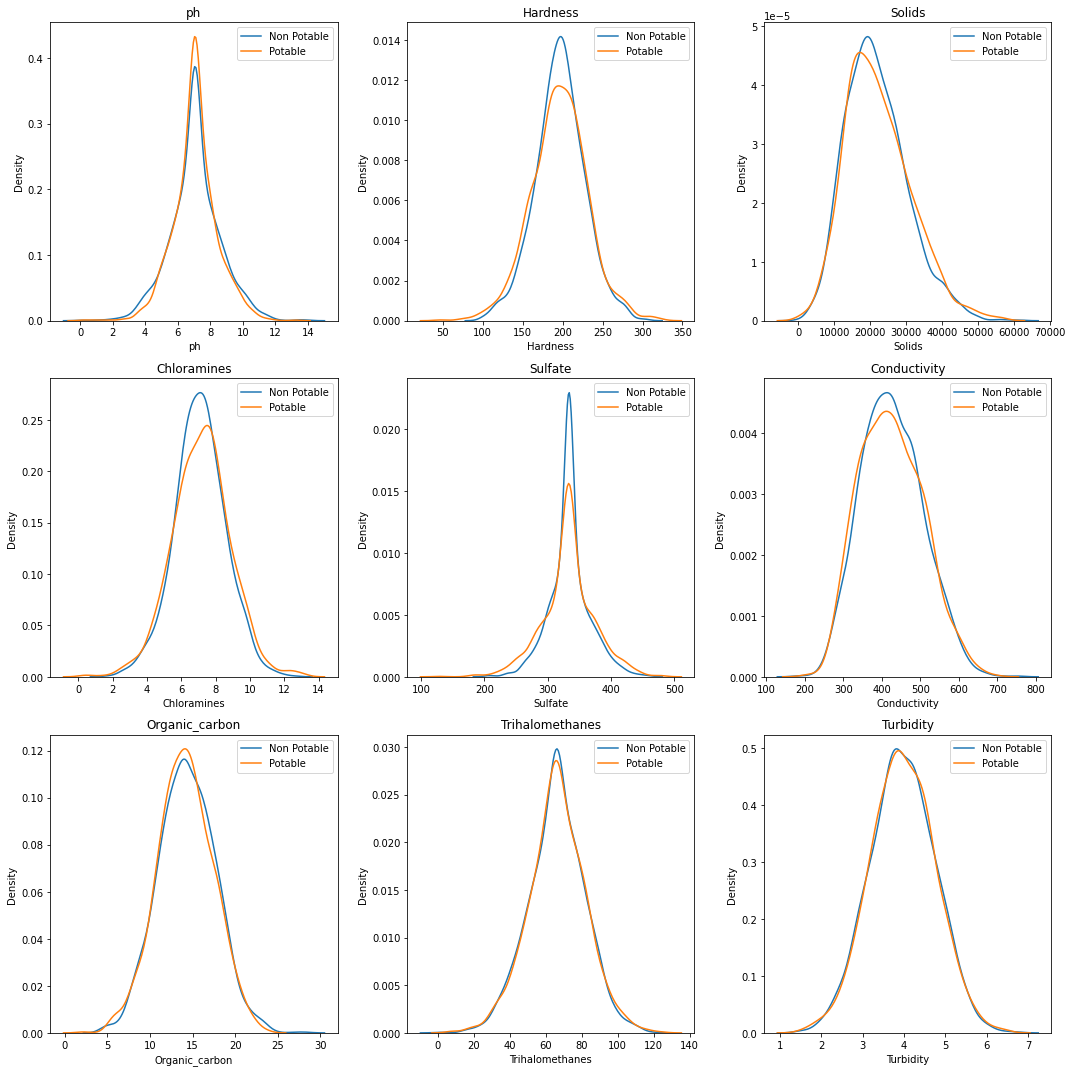

In [53]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

# Feature Exploration:

### **PH:** The WHO guidelines for Drinking water is between 6.5 and 8.5 Outside these limits many halmful metals may become soluble.
* and some of the data excedes thos limits as shown:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31ee5710>,
      dtype=object)

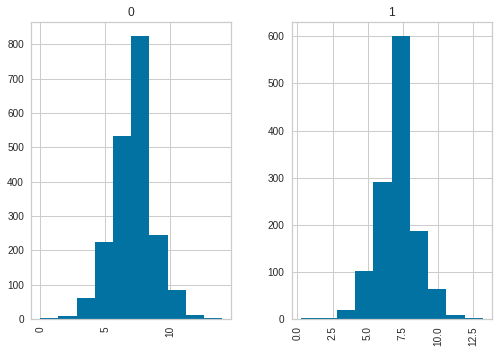

In [73]:
df.hist(column='ph', by='Potability')

###**Hardness:** In some instances, consumers tolerate water hardness in excess of 500 mg/l. 
* and all of the data variables are considered acceptable.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31b48790>,
      dtype=object)

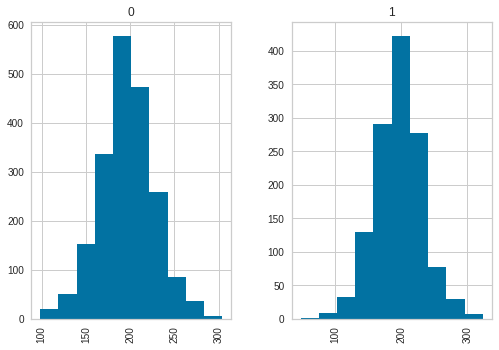

In [75]:
df.hist(column='Hardness', by='Potability')

###**TDS:** Desirable limit for TDS is 500 mg/L and maximum limit is 1000 mg/l which prescribed for drinking purpose. However these guidelines are based on taste. Over 1000 mg/L is considered unacceptable.

* There is a large number of water samples that are above the acceptable 1,000 mg/l TDS limit. However this would leave most of our water samples unaceptable

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31d6e610>,
      dtype=object)

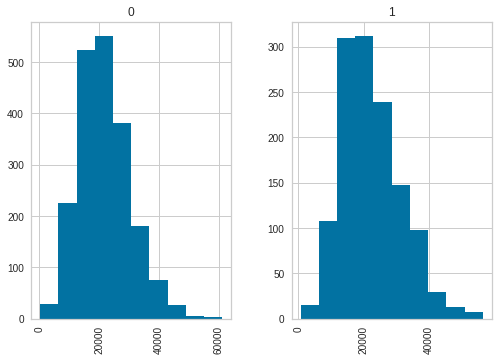

In [77]:
df.hist(column='Solids', by='Potability')

###**Chloramines:**Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water. Chloramines are lower based on taste and smell.

* about Only 2% of the water samples were safe in terms of Chloramines levels

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31c242d0>,
      dtype=object)

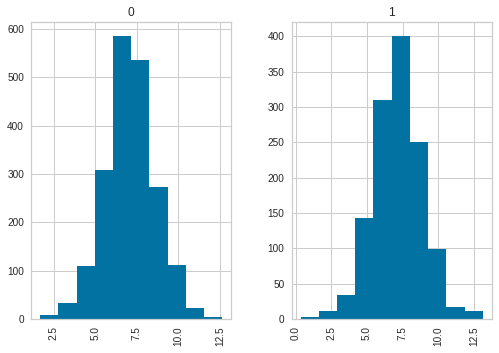

In [78]:
df.hist(column='Chloramines', by='Potability')

### **Sulfate:** It is generally considered that taste impairment is minimal at levels below 250 mg/l. No health-based guideline value has been derived for sulfate
* and only1.8% of the water samples were safe in terms of Sulfate levels

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31aec890>,
      dtype=object)

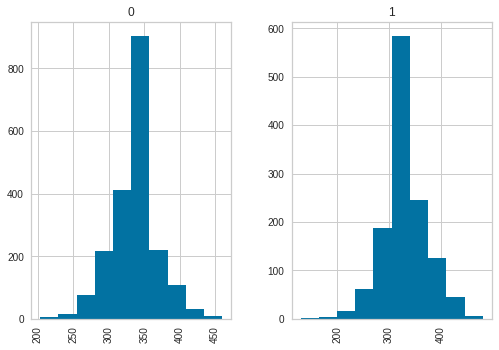

In [80]:
df.hist(column='Sulfate', by='Potability')

### **Conductivity:** EC value should not exceeded 400 μS/cm.
* some of the conductivity values of the samples calssified potable exceed the stated limits

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e3199f4d0>,
      dtype=object)

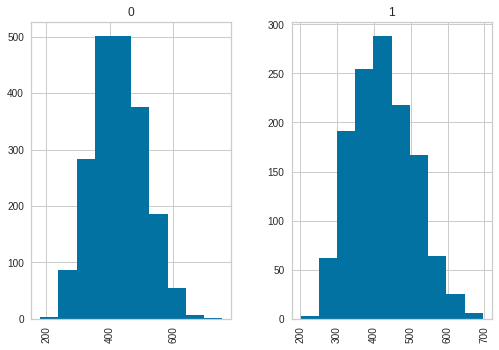

In [81]:
df.hist(column='Conductivity', by='Potability')

### **Total Organic Carbon (TOC):** According to US EPA < 2 mg/L as TOC in treated / drinking water

* some samples classified potable would not pass the US EPA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e31898e10>,
      dtype=object)

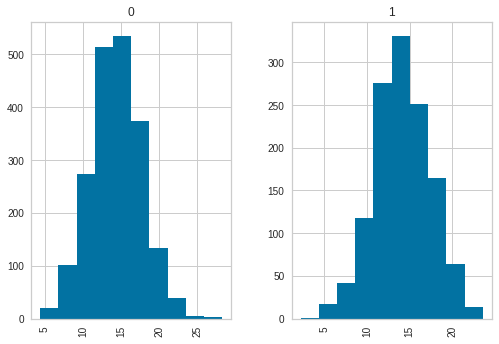

In [82]:
df.hist(column='Organic_carbon', by='Potability')

### **Trihalomethanes:** THM levels up to 80 ppm is considered safe in drinking water
* some samples considered potable also exceeded the 80 ppm levels.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e317cd390>,
      dtype=object)

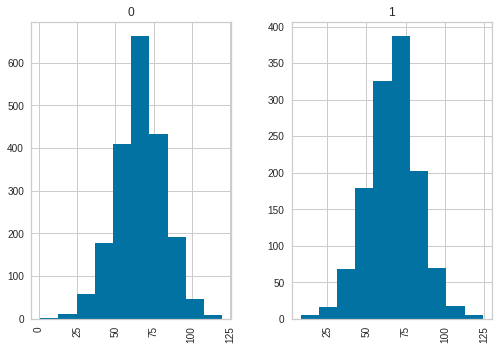

In [83]:
df.hist(column='Trihalomethanes', by='Potability')

### **Turbidity:** WHO recommended value below 5.00 NTU, ideally below 1 NTU
* some samples considered potable also exceeded the 5.00 NTU levels.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e3189ca50>,
      dtype=object)

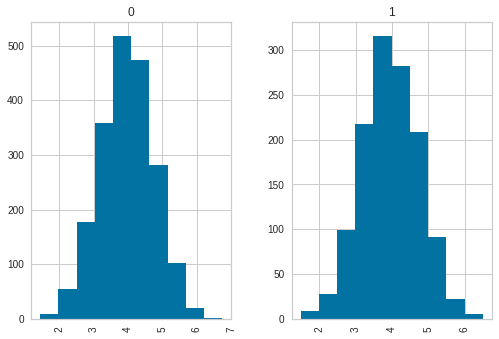

In [84]:
df.hist(column='Turbidity', by='Potability')

# Choosing Our Best Model:

In [54]:
#!pip install pycaret

In [55]:
!pip install pycaret[full]

In [56]:
from pycaret.classification import *

### Depending on the AUC -Area under the curve- estimation, The Catboost Classifier is the best estimation and modelling method.

**- Why AUC?** It represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between potable water with the non potable water, which is importnat to us and so I choose AUC as evaluation metrics.


  



In [57]:
# Using 'setup' from pycaret.classification for preprocessing the data
clf = setup(df, target = 'Potability',
            #remove_outliers = True, outliers_threshold = 0.05, # Removing outliers with threshold of 5 percentile
            #numeric_imputation = 'mean', # Imputing missing values with mean
            normalize = True, # Normalizing the features, so that Gradient Descent will converge fast
            normalize_method = 'zscore', # Mean => 0 and std. deviation => 1
            train_size = 0.8,
            fold = 10, # Number of K-folds
            use_gpu = True)

,Description,Value
0,session_id,8217
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3276, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [60]:
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'
# compare specific models
#best_model = compare_models(include=['catboost', 'svm',])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6775,0.6930,0.3594,0.6550,0.4612,0.2594,0.2840,3.185
qda,Quadratic Discriminant Analysis,0.6805,0.6800,0.3318,0.6824,0.4448,0.2572,0.2907,0.017
et,Extra Trees Classifier,0.6786,0.6793,0.3052,0.6986,0.4228,0.2454,0.2866,1.239
rf,Random Forest Classifier,0.6748,0.6718,0.3348,0.6605,0.4418,0.2469,0.2760,1.370
lightgbm,Light Gradient Boosting Machine,0.6412,0.6478,0.3791,0.5553,0.4484,0.1976,0.2061,0.131
gbc,Gradient Boosting Classifier,0.6588,0.6225,0.2629,0.6538,0.3729,0.1935,0.2323,0.790
knn,K Neighbors Classifier,0.6225,0.6085,0.3692,0.5187,0.4303,0.1606,0.1660,0.057
nb,Naive Bayes,0.6271,0.5849,0.2176,0.5477,0.3096,0.1167,0.1399,0.013
dt,Decision Tree Classifier,0.5969,0.5749,0.4764,0.4810,0.4774,0.1500,0.1506,0.044
ada,Ada Boost Classifier,0.6134,0.5559,0.2058,0.5026,0.2894,0.0864,0.1026,0.270


### Info Bout the Catboost Classifier:

Purpose:
- Training and applying models for the classification problems. Provides compatibility with the scikit-learn tools.

- The default optimized objective depends on various conditions:
* Logloss — The target has only two different values or the target_border parameter is not None.
* MultiClass — The target has more than two different values and the border_count parameter is None.


### In our case, we will use the Logloss function.

# Model Creation:

In [62]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6794,0.6773,0.2941,0.7143,0.4167,0.2453,0.2912
1,0.6718,0.6756,0.3922,0.6250,0.4819,0.2597,0.2748
2,0.6794,0.6850,0.3922,0.6452,0.4878,0.2741,0.2921
3,0.6679,0.7025,0.3431,0.6364,0.4459,0.2380,0.2612
4,0.6641,0.6782,0.2647,0.6750,0.3803,0.2062,0.2487
5,0.6527,0.6831,0.3039,0.6078,0.4052,0.1968,0.2203
6,0.6679,0.6584,0.3960,0.6061,0.4790,0.2507,0.2630
7,0.7023,0.7245,0.4158,0.6885,0.5185,0.3216,0.3430
8,0.6756,0.7228,0.3465,0.6481,0.4516,0.2502,0.2750
9,0.7137,0.7228,0.4455,0.7031,0.5455,0.3515,0.3710


In [63]:
result = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6616,0.7001,0.355,0.637,0.4559,0.2381,0.2596


#Model Analysis:
- A high level of the ph has a high and positive impact on the potability of water, while the Hardness is negatively correlated with the potability of water.

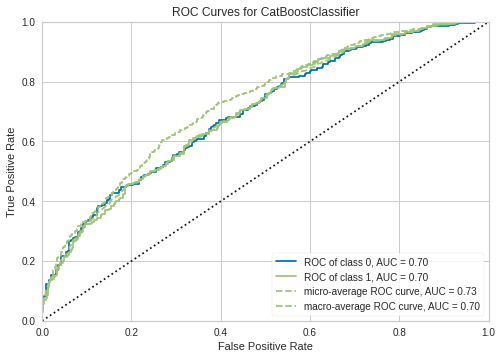

In [64]:
plot_model(catboost)

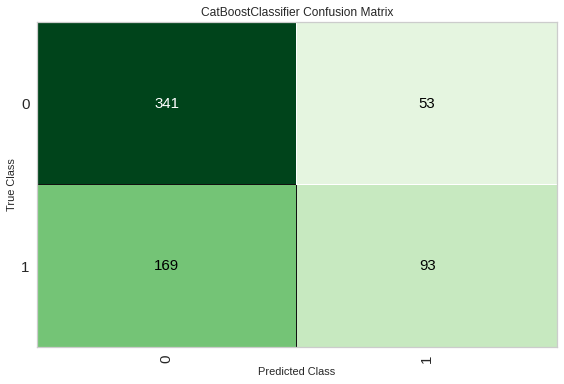

In [66]:
plot_model(catboost, plot = 'confusion_matrix')

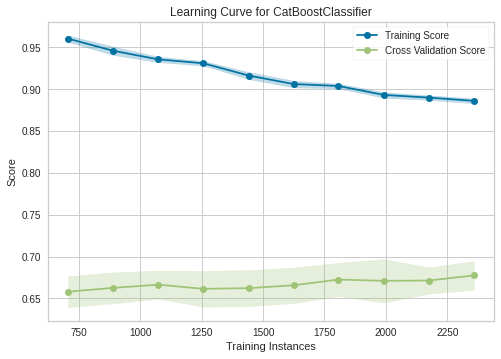

In [70]:
plot_model(catboost, plot = 'learning')

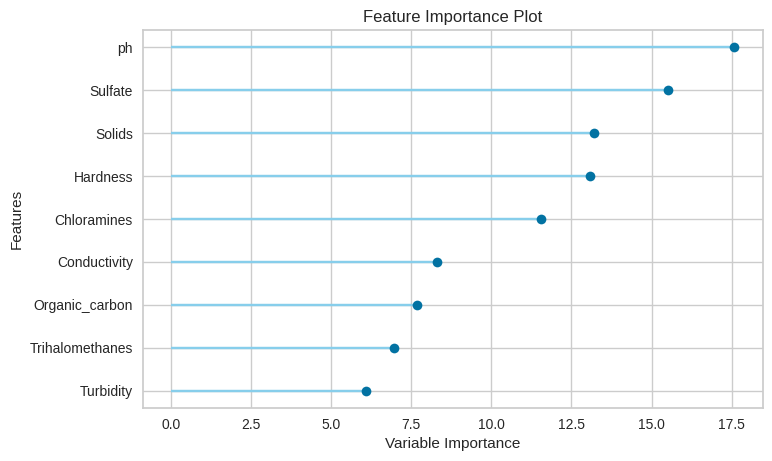

In [71]:
plot_model(catboost, 'feature')

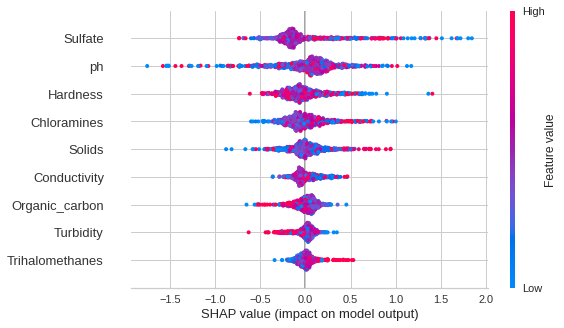

In [72]:
interpret_model(catboost)